# Data Science Job Salaries Dataset


### Columns Description

- **work_year**: The year in which the data was recorded.
- **experience_level**: The level of experience required for the job. Categories include:
  - 'EN' - Entry-level
  - 'MI' - Mid-level
  - 'SE' - Senior-level
  - 'EX' - Executive-level
- **employment_type**: The nature of employment. Types include:
  - 'FT' - Full-time
  - 'PT' - Part-time
  - 'CT' - Contract
  - 'FL' - Freelance
- **job_title**: The title of the job, e.g., 'Data Scientist', 'ML Engineer'.
- **salary**: The salary amount in the specified currency.
- **salary_currency**: The currency in which the salary is paid, e.g., USD, EUR.
- **salary_in_usd**: The salary converted into USD for standardization purposes.
- **employee_residence**: The country or region where the employee resides.
- **remote_ratio**: Indicates the extent to which a job is remote, with values like 0 (non-remote), 50 (partially remote), and 100 (fully remote).
- **company_location**: The location of the company offering the job.
- **company_size**: The size of the company, categorized as:
  - 'S' - Small (1-50 employees)
  - 'M' - Medium (51-250 employees)
  - 'L' - Large (251+ employees)


In [3]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")
!pip install --upgrade pandasai
!pip install openai
!pip install gradio
!pip install python-dotenv

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [2]:
import os
import pandas as pd
from langchain_openai import OpenAI
from pandasai import SmartDataframe

llm =  OpenAI(api_key=os.getenv("OPENAI_API_KEY"))


In [3]:
df = pd.read_csv("./ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [37]:
dfs = SmartDataframe(df, config={"llm": llm})
dfs

In [38]:
response  = dfs.chat('List the first 5 job titles by salary in usd')

print(response)
print("========================================")
print(dfs.last_code_generated)

The highest salary is 3522                    Research Scientist
2011                          Data Analyst
528                           AI Scientist
3747    Applied Machine Learning Scientist
3675              Principal Data Scientist
Name: job_title, dtype: object.
highest_salary = dfs[0].sort_values(by=['salary_in_usd'], ascending=False).head(5)['job_title']
result = {'type': 'string', 'value': f'The highest salary is {highest_salary}.'}


In [43]:
response  = dfs.chat('What is the average salary in usd by job titles? Make sure the output is text sorted in descending order without plot.')


print(response)
print("========================================")
print(dfs.last_code_generated)

The average salary in usd by job titles sorted in descending order:
                               job_title salary_in_usd
                  Data Science Tech Lead   $375,000.00
                    Cloud Data Architect   $250,000.00
                               Data Lead   $212,500.00
                     Data Analytics Lead   $211,254.50
                Principal Data Scientist   $198,171.12
                Director of Data Science   $195,140.73
                 Principal Data Engineer   $192,500.00
      Machine Learning Software Engineer   $192,420.00
                    Data Science Manager   $191,278.78
                       Applied Scientist   $190,264.48
     Principal Machine Learning Engineer   $190,000.00
                            Head of Data   $183,857.50
            Data Infrastructure Engineer   $175,051.67
          Business Intelligence Engineer   $174,150.00
              Machine Learning Scientist   $163,220.08
                       Research Engineer   $163,108.

In [44]:
print(dfs.last_code_generated)

avg_salary = dfs[0]['salary_in_usd'].groupby(dfs[0]['job_title']).mean().reset_index()
avg_salary = avg_salary.sort_values(by='salary_in_usd', ascending=False).reset_index(drop=True)
avg_salary['salary_in_usd'] = avg_salary['salary_in_usd'].apply(lambda x: '${:,.2f}'.format(x))
result = {'type': 'string', 'value': f"""The average salary in usd by job titles sorted in descending order:
{avg_salary.to_string(index=False)}"""}


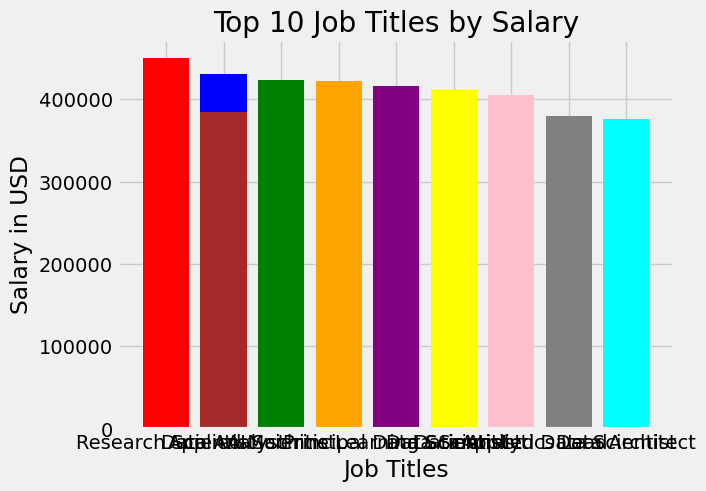

/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png


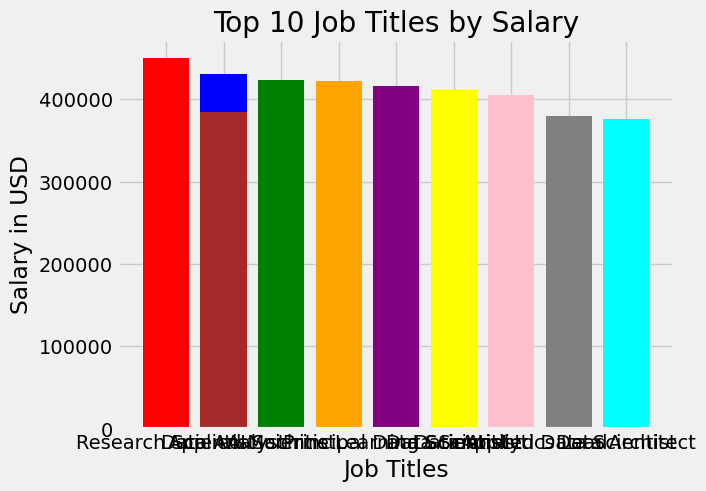

In [45]:
response  = dfs.chat('Plot a bar chart showing top 10 job titles, using different colors for each bar')

print(response)

In [46]:
print(dfs.last_code_generated)

result = {}
plt.bar(dfs[0]['job_title'].head(10), dfs[0]['salary_in_usd'].head(10), color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])
plt.xlabel('Job Titles')
plt.ylabel('Salary in USD')
plt.title('Top 10 Job Titles by Salary')
plt.savefig('/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png')
plt.show()
result['type'] = 'plot'
result['value'] = '/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png'
return result


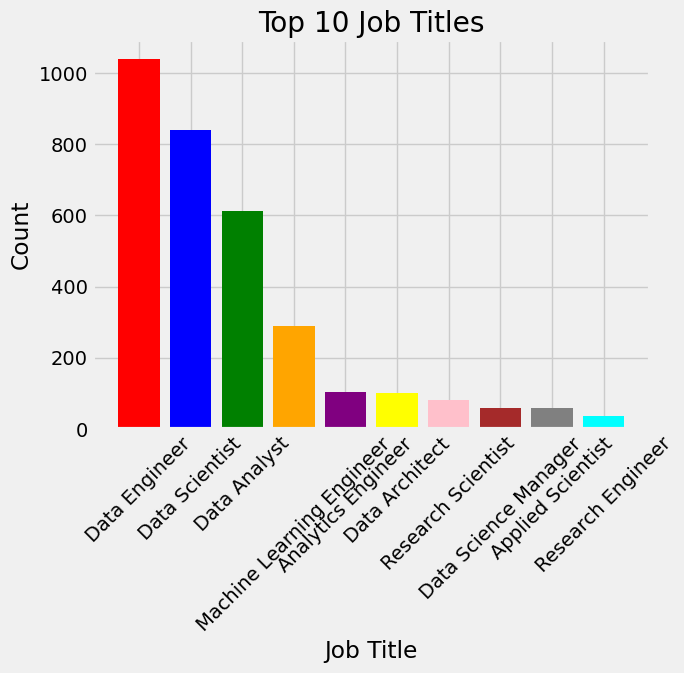

/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png


In [47]:
response  = dfs.chat('Plot a bar chart showing top 10 job titles, using different colors for each bar')

print(response)

In [48]:
print(dfs.last_code_generated)

top_10_titles = dfs[0]['job_title'].value_counts().head(10)
plt.bar(top_10_titles.index, top_10_titles.values, color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
result = {'type': 'plot', 'value': '/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png'}


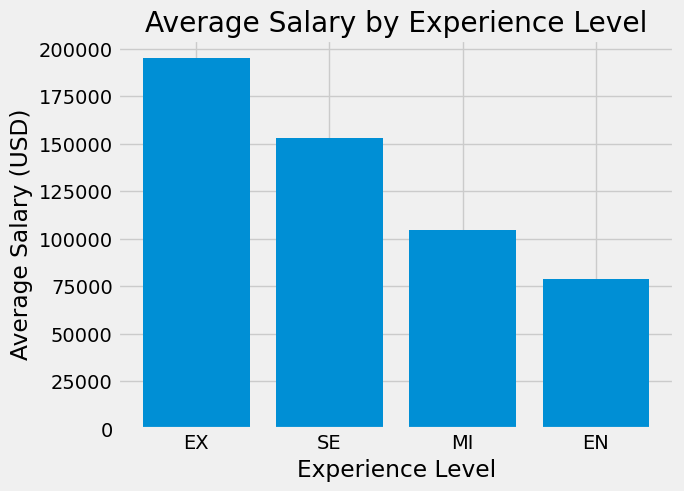

/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png


<Figure size 640x480 with 0 Axes>

In [49]:
response  = dfs.chat('Plot a bar chart showing average salary in usd by experience level')

print(response)

In [50]:
print(dfs.last_code_generated)

combined_df = pd.concat(dfs)
avg_salary = combined_df.groupby('experience_level')['salary_in_usd'].mean()
avg_salary = avg_salary.sort_values(ascending=False)
plt.bar(avg_salary.index, avg_salary)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level')
plt.show()
plt.savefig('/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png'}


/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png


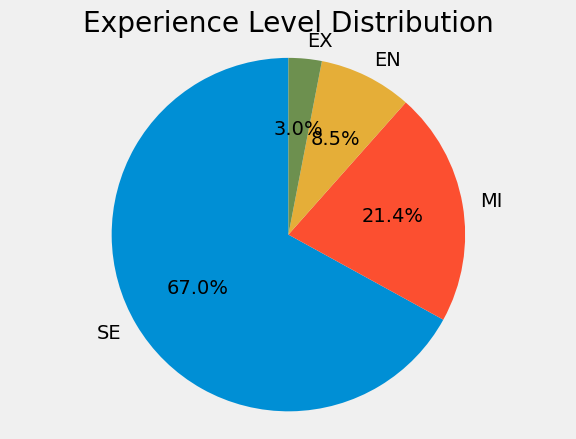

In [51]:
response  = dfs.chat('Plot a pie chart showing the experience level distribution')

print(response)

In [52]:
print(dfs.last_code_generated)

experience_levels = dfs[0]['experience_level'].value_counts()
labels = experience_levels.index.tolist()
values = experience_levels.values.tolist()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Experience Level Distribution')
plt.savefig('/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/Users/tuchsanai/Documents/GitHub/Machine_Learning/01_basic/PandasAI-Tutorials-main/exports/charts/temp_chart.png'}
